In [76]:
import pandas as pd


In [77]:
data=pd.read_csv("train.csv")
data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

In [79]:
sex={"male":0,"female":1}


In [80]:
data.Sex=[sex[item] for  item in data.Sex]
print(data)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
5              6         0       3   
6              7         0       1   
7              8         0       3   
8              9         1       3   
9             10         1       2   
10            11         1       3   
11            12         1       1   
12            13         0       3   
13            14         0       3   
14            15         0       3   
15            16         1       2   
16            17         0       3   
17            18         1       2   
18            19         0       3   
19            20         1       3   
20            21         0       2   
21            22         1       2   
22            23         1       3   
23            24         1       1   
24            25         0       3   
25          

In [81]:
sns.set

<function seaborn.rcmod.set(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=True, rc=None)>

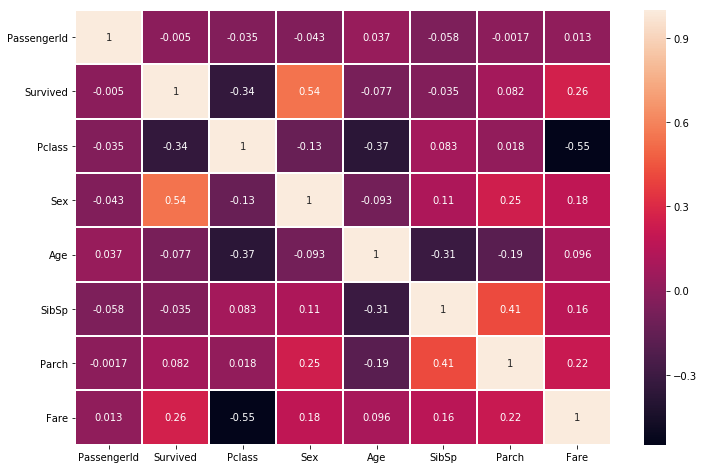

In [82]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(),annot=True,linecolor='w',linewidths='1')

In [83]:
training_data=data[["PassengerId","Pclass","Fare","Sex"]]


In [84]:
output_data=data["Survived"]

In [85]:
from  sklearn.model_selection import train_test_split

In [86]:
X,x_test,Y,y_test=train_test_split(training_data,output_data,test_size=0.3,random_state=5)

In [87]:
from sklearn.linear_model import LogisticRegression

In [88]:
model=LogisticRegression()


In [89]:
model.fit(X,Y)


c:\users\ashish\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [90]:
predictions=model.predict(x_test)

In [91]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [92]:
confusion=confusion_matrix(predictions,y_test)

In [93]:
confusion

array([[148,  36],
       [ 19,  65]], dtype=int64)

In [94]:
score=accuracy_score(predictions,y_test)

In [95]:
score

0.7947761194029851

In [96]:
test_data=pd.read_csv("test.csv")


In [97]:
test_data.Sex=[sex[item] for  item in test_data.Sex]
print(test_data)

     PassengerId  Pclass                                               Name  \
0            892       3                                   Kelly, Mr. James   
1            893       3                   Wilkes, Mrs. James (Ellen Needs)   
2            894       2                          Myles, Mr. Thomas Francis   
3            895       3                                   Wirz, Mr. Albert   
4            896       3       Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
5            897       3                         Svensson, Mr. Johan Cervin   
6            898       3                               Connolly, Miss. Kate   
7            899       2                       Caldwell, Mr. Albert Francis   
8            900       3          Abrahim, Mrs. Joseph (Sophie Halaut Easu)   
9            901       3                            Davies, Mr. John Samuel   
10           902       3                                   Ilieff, Mr. Ylio   
11           903       1                         Jon

In [98]:
test_data.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,S


In [99]:
test_data=test_data[["PassengerId","Pclass","Fare","Sex"]]


In [100]:
test_data.head(2)

,PassengerId,Pclass,Fare,Sex
0,892,3,7.8292,0
1,893,3,7.0000,1


In [101]:
test_data['Fare']=test_data['Fare'].fillna(test_data['Fare'].mean())

In [102]:
test_predictions=model.predict(test_data)

In [103]:
test_data.head(2)

,PassengerId,Pclass,Fare,Sex
0,892,3,7.8292,0
1,893,3,7.0000,1


In [104]:
test_predictions_df={
    "PassengerId" :test_data["PassengerId"],
    "Survived": test_predictions
}

In [105]:
test_predictions_df=pd.DataFrame(test_predictions_df)

In [106]:
test_predictions_df=test_predictions_df.set_index("PassengerId")

In [107]:
test_predictions_df.to_csv('submission.csv')